In [1]:
import datatable as dt
import pandas as pd
import seaborn as sns
import os
from time import time
from datatable import f
%matplotlib inline

In [2]:
def append_row(df, row):
    df.rbind(dt.Frame([[j] for j in row]), bynames=False)

In [3]:
df_time = dt.Frame([[]] * 4, names=["library", "file", "size", "time"])

In [4]:
def measure(task, file):
    size = os.stat(os.path.expanduser(file)).st_size
    _ = dt.fread(file)
    for lib in ['datatable', 'pd-via-dt', 'pandas']:
        try:
            t0 = time()
            if lib == "datatable":
                df = dt.fread(file)
            elif lib == "pd-via-dt":
                df = dt.fread(file).topandas()
            else:
                df = pd.read_csv(file)
            t1 = time()
            append_row(df_time, [lib, task, size, t1 - t0])
            print("[%9s] %s = %f" % (lib, task, t1 - t0))
        except Exception as e:
            print("[%9s] %s = Error: %s" % (lib, task, e))
            append_row(df_time, [lib, task, size, 0])

In [5]:
measure("airlines", "~/datasets/airlines_all.05p.csv")
measure("higgs2M", "~/datasets/higgs_head_2M.csv")
measure("donors", "~/datasets/donors-choose/train_resources.csv")
measure("allstate", "~/datasets/allstate-bodilyclaims-kaggle/train_set_NA.csv")
measure("milsongs", "~/datasets/milsongs/milsongs-cls-train.csv.gz")

[datatable] airlines = 5.278488
[pd-via-dt] airlines = 15.209254
[   pandas] airlines = Error: 'utf-8' codec can't decode byte 0xe4 in position 4: invalid continuation byte
[datatable] higgs2M = 3.320412
[pd-via-dt] higgs2M = 3.721059
[   pandas] higgs2M = 17.724061
[datatable] donors = 2.474557
[pd-via-dt] donors = 3.718885
[   pandas] donors = 14.892595
[datatable] allstate = 20.158744
[pd-via-dt] allstate = 48.743790


/Users/pasha/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


[   pandas] allstate = 65.144870
[datatable] milsongs = 3.180381
[pd-via-dt] milsongs = 3.417540
[   pandas] milsongs = 9.269497


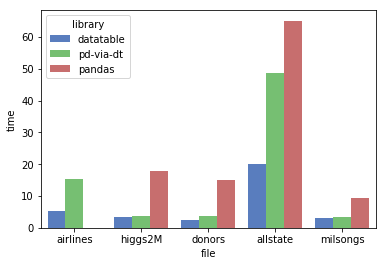

In [6]:
ax = sns.barplot(x="file", y="time", hue="library", palette="muted", data=df_time.topandas())

In [23]:
f0 = df_time[f.library=="datatable", {"file": f.file, "dt": f.time}]
f1 = df_time[f.library=="pandas", {"pd": f.time}]
f0.cbind(f1)
f0[:, {"file": f.file, "pd/dt": f.pd / f.dt}]

     file        pd/dt
---  --------  -------
 0   airlines  0      
 1   higgs2M   5.33791
 2   donors    6.01829
 3   allstate  3.23159
 4   milsongs  2.91459

[5 rows x 2 columns]
